# Project Proposal

## How Horsepower Varies Based on the Numbers of Cylinders in a Car Engine
 **Authors** Group 14: Sid Ahuja, Tejasvi Kathuria, Xiaoran Fan, Ci Xu

## Introduction


There are many factors that determine the performance of a car. Previous research demonstrates that the engine efficieny is related to the volume and number of the cylinders (Emiroğlu et al., 2018). However, there are few and limited studies on the relationship between the number of cylinders and horsepower. In general, cars with different number of cylinders have different horsepower (Kellermayr et al., 2019). We are interested in the different effects on horsepower between the cars with 4- and 6-cylinder engines. Our question is: "Do cars with 6-cylinder engines have higher horsepowers than cars with 4-cylinder engines?" We will answer this question by analysing the sample mean (the location statistics) and the standard deviation (the scale statistics) of the horsepower and how it differs with the number of cylinders in the samples.

Based on our question, our competeing hypotheses are (where μ represents the average horsepower):
- Null Hypothesis: There is no difference in horsepower between 4- and 6-cylinder engines (μ<sub>6-cyl</sub> − μ<sub>4-cyl</sub> = 0)
- Alternative Hypothesis: 6-cylinder engines have a greater horsepower than 4-cylinder engines (μ<sub>6-cyl</sub> − μ<sub>4-cyl</sub> > 0)

Our data set is the Auto MPG data set, which was obtained from Carnegie Mellon University's StatLib library. The 1983 American Statistical Association Exposition made use of this dataset. 

Attribute informations:

|Variables|Attribute|
|:---:|:---:|
|mpg|continuous|
|cylinders|multi-valued discrete|
|displacement|continuous|
|horsepower|continuous|
|weight|continuous|
|acceleration|continuous|
|model year|multi-valued discrete|
|origin|multi-valued discrete|
|car name|string (unique for each instance)|



## Preliminary Results


### Loading Required Packages and Setting Seed

In [ ]:
library(tidyverse)
library(infer)
library(repr)
library(cowplot)
library(datateachr)
library(digest)
library(dplyr)


### Loading The Data

In [49]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", 
              "auto-mpg.data")

In [50]:
cars <- read.table("auto-mpg.data") 
head(cars)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
4,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
5,17,8,302,140.0,3449,10.5,70,1,ford torino
6,15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


### Cleaning and Wrangling The Data

Renaming the variables and cleaning the data. The variable of horsepower is changed into a numeric variable, and the variable of the number of cylinders is changed into a categorical variable. 

In [51]:
cars <- read.table("auto-mpg.data")%>%
    rename(mpg = V1,
           cylinders = V2,
           dispacement = V3,
           horsepower = V4,
           weight = V5,
           acceleration = V6,
           model = V7,
           origin = V8,
           name = V9) %>%
    mutate(horsepower = as.numeric(horsepower),
           cylinders = as.factor(cylinders))
head(cars)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


,mpg,cylinders,dispacement,horsepower,weight,acceleration,model,origin,name
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


We delete the null values in the "horsepower" column and filter for the cylinder numbers we want to analyze. We then select the columns relevant to our study.

In [52]:
cars_variables <- cars %>% 
    filter(!is.na(horsepower),
           cylinders %in% c(6,4))%>%
    select(cylinders, horsepower)
head(cars_variables)

,cylinders,horsepower
,<fct>,<dbl>
1,4,95
2,6,95
3,6,97
4,6,85
5,4,88
6,4,46


Next, we calculate the test statistics of multiple parameters and present them in the table shown below.

In [53]:
cars_summ_hp <- cars_variables %>%
    group_by(cylinders) %>%
    summarize(size = n(),
              mean = mean(horsepower),
              sd = sd(horsepower),
              minimum = min(horsepower),
              lower_quartile = quantile(horsepower, 0.25),
              median = median(horsepower),
              upper_quartile = quantile(horsepower, 0.75),
              max = max(horsepower))
cars_summ_hp

cylinders,size,mean,sd,minimum,lower_quartile,median,upper_quartile,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,199,78.28141,14.52310,46,68.0,78,88,115
6,83,101.50602,14.31047,72,92.5,100,110,165


### Plotting The Relevant Data

### Boxplot of The Cylinders and The Horsepower

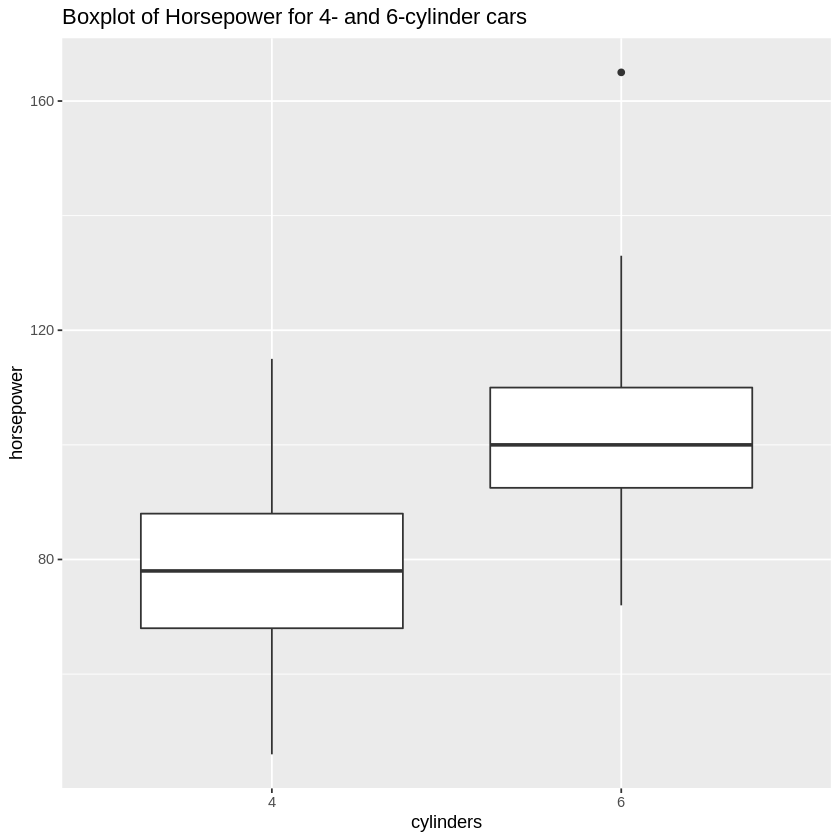

In [54]:
cars_boxplot <- cars_variables %>%
    ggplot(aes(x= cylinders, y = horsepower)) +
    geom_boxplot()+
    ggtitle("Boxplot of Horsepower for 4- and 6-cylinder cars")
cars_boxplot

Here, we can see that that the standard deviation of horsepower for 4 cylinders is similar to the standard deviation of horsepower for 6 cylinders. We can also see that the sample's average horsepower of 6 cylinder engines is greater than the average horsepower of 6 cylinder engines which suggests a differnce; however, the overlap between the boxplots is of some concern and requires further testing. 

### Bootstrap Sampling Distribution

**4 cylinder cars** <br>
- Sample mean marked in red
- 90% confidence interval boundaries marked in blue

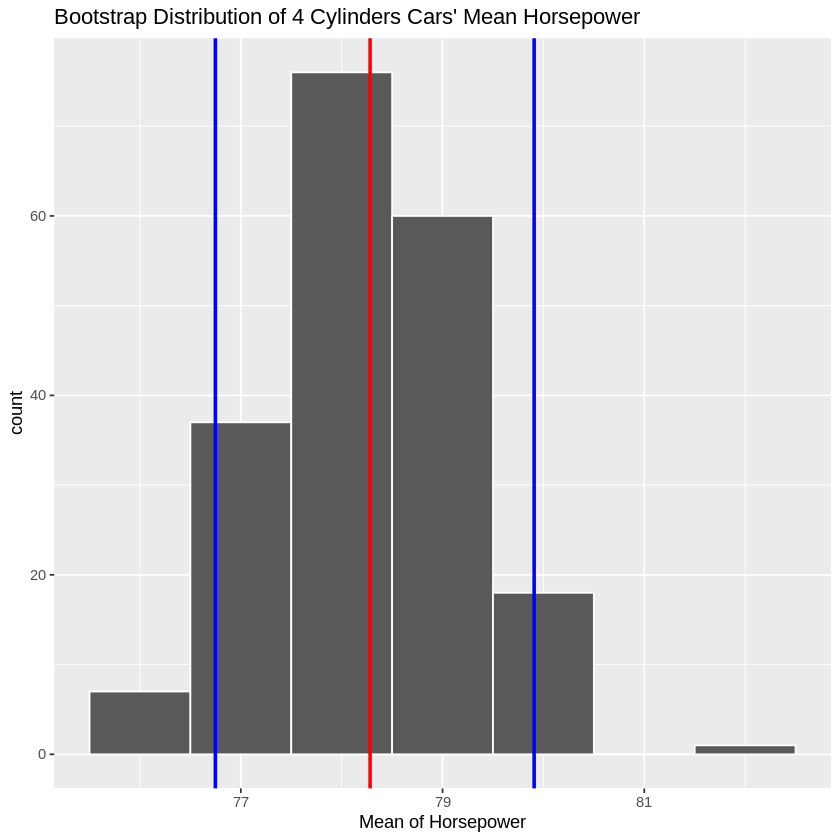

In [55]:
set.seed(1234)
cars_bootstrapped1 <- cars_variables %>%
    filter(cylinders == "4") %>%
    specify(response = horsepower) %>%
    generate(type = "bootstrap", reps = 199) %>%
    calculate(stat = "mean")

cars_ci1 <- cars_bootstrapped1 %>%
    get_confidence_interval(level = 0.90, type = "percentile")

cars_4cylinders_plot <- cars_bootstrapped1 %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 1, color = "white") +
    geom_vline(xintercept = cars_ci1[[1]], color = "blue", size = 1) +
    geom_vline(xintercept = cars_ci1[[2]], color = "blue", size = 1) +
    geom_vline(xintercept = cars_summ_hp[[1,3]], color = "red", size = 1) +
    xlab("Mean of Horsepower") +
    ggtitle("Bootstrap Distribution of 4 Cylinders Cars' Mean Horsepower")

cars_4cylinders_plot

**6 cylinder cars**<br>
- Sample mean marked in red
- 90% confidence interval boundaries marked in blue

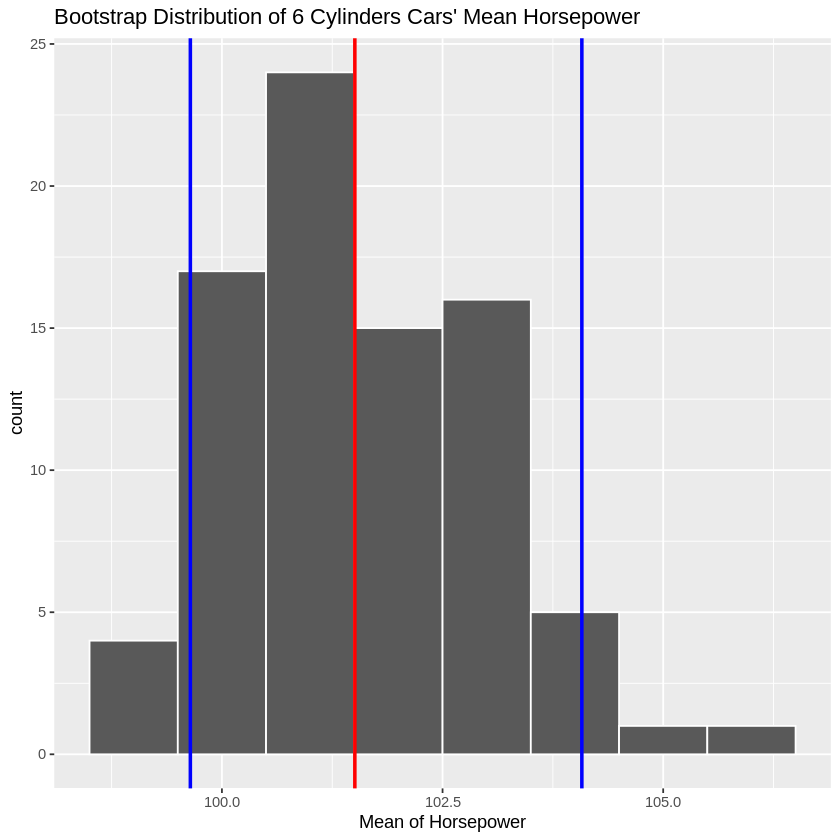

In [56]:
set.seed(1234)
cars_bootstrapped2 <- cars_variables %>%
    filter(cylinders == "6") %>%
    specify(response = horsepower) %>%
    generate(type = "bootstrap", reps = 83) %>%
    calculate(stat = "mean")

cars_ci2 <- cars_bootstrapped2 %>%
    get_confidence_interval(level = 0.90, type = "percentile")

cars_6cylinders_plot <- cars_bootstrapped2 %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 1, color = "white") +
    geom_vline(xintercept = cars_ci2[[1]], color = "blue", size = 1) +
    geom_vline(xintercept = cars_ci2[[2]], color = "blue", size = 1) +
    geom_vline(xintercept = cars_summ_hp[[2,3]], color = "red", size = 1) +
    xlab("Mean of Horsepower") +
    ggtitle("Bootstrap Distribution of 6 Cylinders Cars' Mean Horsepower")

cars_6cylinders_plot

## Method: Plan

This report utilizes a large sample of 4- and 6-cylindered engine cars from 1970-1982. Using this large sample and proper statsitical inference methods, we can make estimates, test the hypotheses, and come to conlusions with a high degree of reliabilty and credibilty. 

However, even though we can make some preliminary calculations and estimiations of certain parameters, we can not use these initial point estimates to come to any final conclusions because they just concern the sample and may or may not make accurate predictions about the population. To incorporate accuracy and precision in our report, we have to bootstrap the sample for each engine type, find the confidence interval to estimate the population parameter, as well as conduct a hypothesis test with a 5% significance level to see if we should reject or not reject the null hypothesis. Because our response variable is continuous and our explanatory variable is categorical (2 levels), we will use the Two Means method to compare the average horsepowers of both types of engines.

Just based on our initial visulaization, we expect to reject the null hypothesis and favor the hypothesis that 6-cylinder engines have a higher horsepower than 4-cylinder engines. Regardless of the outcome of our findings, this report will help to fill gaps in the current literture surrounding the relationship between number of cylinders and horsepower. Further research could incorporate these findings and test other factors related to car performance and efficicny such as relationships bewteen miles-per-gallon and horsepower.


## Reference

Emiroğlu, A. O., & Şen, M. (2018). Combustion, performance and emission characteristics of various alcohol blends in a single cylinder diesel engine. Fuel, 212, 34–40. https://doi.org/10.1016/j.fuel.2017.10.016 

Kellermayr, G., Schutting, E., &amp; Mitterecker, H. (2019). Turbocharging of engines with low cylinder numbers: A thermodynamic consideration. Automotive and Engine Technology, 4(3-4), 153–167. https://doi.org/10.1007/s41104-019-00048-8 